# American Sign Language Recognition using Convolutional Neural Networks

Pauline Claes (20163274)

Master Digital Text Analysis - Machine Learning II

26 January 2021



# Introduction

It is common knowledge that the Deaf and hard of hearing community suffer from communication problems with the hearing majority. It would be an important step forward for the community to be able to understand and be understood without having to think about it twice. Unfortunately, this is often not the case. There has already been done plenty of research in this field, yielding promising results. The research led by Pigou et al (2015) was able to predict 20 Italian gestures with an accuracy of 95.68% on the test set using Convolutional Neural Networks. Using a VGG network, the research led by Amer & Kamees (2020) was able to obtain an accuracy of  98.84% on the validation set. Their research included the letters J and Z, as well as a sign for 'space' and 'delete', in order to create a writing system using images for PCs with a normal webcam. 

The computational recognition of Sign Language could contribute to important tools for the Deaf community, as the alternative of written communication is impersonal and often problematic (Pigou et al. 2015). For example, this advance in technology could eventually lead to applications enabling hearing communication partners to understand the signs expressed by a Deaf person (Jachak, 2020). However, these ideas are a bit too advanced for the scope of this paper. In this study, we will build Convolutional Neural Networks in order to classify images of hands expressing a letter from the American Sign Language alphabet. Even though Sign Language does not communicate by spelling out each word, this research paper might be a good step toward the computational recognition of Sign Language in general.  On a more personal note, this research speaks to me because I have a hearing impairment. Even though I do not know Sign Language and in most situations I am perfectly fine to understand spoken language, I think this advance in technology could actually mean an important step forward for the Deaf and hard of hearing community.

The dataset was collected from the data science community Kaggle (Hand-Sign-Images, 2020) and originally contained a total of 34,600 grayscale images (28x28) spread throughout a train and test folder. The images portray 24 letters of the American Sign Language alphabet, excluding the letters *J* and *Z* as these require motion to be expressed, thus cannot be contained within one picture. Therefore, we have 24 classes of images that the neural networks will be trained on.

After downloading the images from Kaggle, both the train and test folders had to be balanced. Originally, the different class folders were not balanced; meaning that they did not have the same amount of instances (images) per class. As the model should not be biased, we randomly selected 950 images for each of the class folders (24) in the train set, and 100 images for each of the class folders (24) in the test set. Subsequently, we randomly selected 150 images for each of the class folders in the train set to construct a validation set. That way, we now have a total of 25,200 images in our entire dataset: 19,200 train images, 3,600 validation images and 2,400 test images.

This paper explores the predictive capabilities of a Sequential "simple" Convolutional Neural Network, the VGG16 neural network, the ResNet50 Convolutional Neural Network with randomly initialized weights, the ResNet50 Convolutional Neural Network with pretrained ImageNet weights and the MobileNet neural network with pretrained ImageNet weights. For each of the models used, we first investigate the training and validation processes, discussing which layers and hyperparameters have been used and how they affect these processes. After the model selection, the best performing model will be tested on its ability to generalize to the unseen data from the test set that has been kept apart until then. Furthermore, the code used will have comments added to explain what we are doing where.



## Hypothesis

Given the successful previous research that has been done in the past (cf. Introduction), we expect that all models will perform relatively well on our data set. Another reason to hypothesize this, is that the image data set that we used is designed for image classification using neural networks (Kaggle, 2020). To be more precise, after preprocessing, it consisted of 25,200 grayscale images of 28x28 with limited to no background noise. Therefore, we expect that for the neural networks themselves, it will be a relatively easy classification task. Nevertheless, there are some signs that look very much alike and it might even be challenging for humans to distinguish between them at first sight (*A, E, M, N* and *S*, as well as *T, G* and *X*). That is why we can expect some classes to have lower True Positive Rates than others. 



## Personal challenges
While we saw image classification in the Machine Learning II course, I found this assignment quite challenging as the methods to load and split the data in the relevant subsets were quite different from what we had done in the course and we were dependent on the Internet for a substantial part of this assignment. Even though there is an immense amount of resources available on the Internet, I found it hard to be able to distinguish between useful sources and noise sometimes, as I feel like I do not know "all of the things" there are to know about deep neural networks. Nevertheless, the Deeplizard website and YouTube channel has proven to be very useful for practical tips to get started on the project, such as how to construct the data set on disc and how to load it into an ImageDataGenerator. 

However, the chosen data set and the classification task at hand motivated me to go forward, as I believe (more advanced) automated sign language technologies could be of indispensable use for the Deaf and hard of hearing community. 



In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/machine_learning2/ASL/asl-images')

# 1) Installing packages

In [ ]:
# install necessary packages

# loading of images
from keras.preprocessing.image import ImageDataGenerator 

# building of models
import tensorflow.keras as keras
from keras import models, layers, optimizers 
import tensorflow  as tf 
from keras.applications.vgg16 import VGG16

# one-hot encoding
from keras.utils import to_categorical

# performance assessment
from  sklearn.metrics import accuracy_score

# general use
import pandas as pd 
import numpy as np 

# moving of files and constructing validation directory
import random as rnd
import shutil 
import glob 
import os 

# plotting
%pylab inline
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# to get reproducible results:
np.random.seed(1234)
tf.random.set_seed(1234)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# check where drive is located
%pwd

'/content'

In [ ]:
# change to right directory
%cd /content/drive/MyDrive/machine_learning2/ASL

/content/drive/MyDrive/machine_learning2/ASL


# 2) Preprocessing
First, we specify the directories of our train, validation and test set and specify the classes. Secondly, we instantiate the ImageDataGenerator and specify that the images should be rescaled by dividing them by 255. Each pixel value ranges from 0 to 255. Dividing them by 255, we transform them into a range from 0 to 1, which makes it easier for the model to read and makes training faster. 

After that, we instantiate `flow_from_directory` which will load the images from our directory on Google Drive. Moreover, we specify that we want the target_size to be (32,32). Even though our original images are already (28,28), we resize them to (32,32) because the ResNet model that we will be training later on requires this as a minimum size and it does not have implications for the other models that we will be running. We also specify that the color_mode is "RGB", so that the images will be expanded to an RGB format, meaning that they have 3 channels instead of 1. On top of that, we indicate the class_mode ("categorical" as we are dealing with multiple categories) as well as the batch size that is equal to the size of the respective set. We do this because we use `next()` in the following step to load the images into X_train, y_train, X_val, y_val, X_test, y_test. This loads batches of data into the model. We want this to be equal to our respective set size, so that all the images get loaded in at once. Lastly, we set `shuffle=True` for the training set, in order for the data to be shuffled and to anticipate any particular order in which the data might have been loaded into the generator. However, we do not do this for the validation set or the test set. As we want to be able to plot confusion matrices after the model selection, we want to access the labels in an unshuffled order (Image Preparation for Convolutional Neural Networks with TensorFlow’s Keras API, 2020).

As many machine learning algorithms require input and output features to be numeric rather than categorical, our categorical class labels should be transformed into numeric features (Chiu, 2020). That is where one-hot encoding comes in; a commonly used technique to binarize the class labels. One-hot encoding creates a matrix of one row vector per data point (image) and one column vector per class included. The class membership of each data point (image) is then represented in binary format. More specifically, it assigns a 1 to a data point in the column of the class it is a member of. So, to put it more concretely, for the training set we have a matrix of 19,200 rows and 24 columns. We can verify this if we check the shape of *y_train* (cf. infra). For example: if the first image in the training set is part of class *A*, it will have a 1 at (0,0) and a 0 in all the other positions in that row. Or, if we have the 500th image that is part of class *X* (for example), it will have a 1 at (499, 23) (as the matrix is zero-indexed) and a 0 in all of the other positions in that row. This way we have a binary, one-hot encoded sparse matrix. 

In [ ]:
# store directories of images in variables 
TRAIN_DIR = "asl-images/asl-train/"
VAL_DIR = "asl-images/asl-val"
TEST_DIR = "asl-images/asl-test/"

# store the 24 classes that we want to classify the images in in a variable name "classes"
CLASSES = ["A","B","C", "D", "E", "F", "G","H", "I","K", "L", "M",
           "N","O","P", "Q","R","S", "T","U", "V", "W","X", "Y"]
 

In [ ]:
# rescale the images by dividing them by 255. This way, the pixel values will be
# within a range of 0 to 1 instead of 0 to 255, which makes it easier and faster
# for the neural networks to process.
IMAGE_GEN = ImageDataGenerator(rescale=1.0/255.0)
TEST_GENERATOR = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
TRAIN_GEN = IMAGE_GEN.flow_from_directory(TRAIN_DIR, 
                                         target_size = (32,32), # Resnet50 requires at least 32x32
                                          color_mode = "rgb", # resnet50 requires at least 3 channels
                                          class_mode="categorical", # because we're dealing with multiple categories
                                          batch_size = 19200, # batch size equal to number of images
                                          shuffle=True) # shuffled training data
VAL_GEN = IMAGE_GEN.flow_from_directory(VAL_DIR, 
                                        target_size = (32,32), # Resnet requires at least 32x32
                                        color_mode="rgb", # resnet50 requires 3 channels
                                        class_mode="categorical", # Dealing with multiple categories
                                        batch_size = 3600, # batch size equal to number of images
                                        shuffle=False) # unshuffled validation data
TEST_GEN = TEST_GENERATOR.flow_from_directory(TEST_DIR,
                                         target_size=(32,32), # Resnet50 requires at least 32x32
                                         color_mode = "rgb", # resnet50 requires 3 channels
                                         class_mode = "categorical", # multiple categories
                                         batch_size = 2400, # batch size equal to number of images
                                         shuffle=False) # unshuffled testing data


Found 19200 images belonging to 24 classes.
Found 3600 images belonging to 24 classes.
Found 2400 images belonging to 24 classes.


In [ ]:
# load the image data and the batches into X and y variables
X_train, y_train = next(TRAIN_GEN)
X_val, y_val = next(VAL_GEN)
X_test, y_test = next(TEST_GEN)

In [ ]:
# check out the shape
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

# When we explained one-hot encoding above, we said that the labels would be transformed from a 
# vector into a binarized sparse matrix. We can verify this by looking at the shapes of 
# y_train, y_val and y_test, containing the class (output) labels. 

## If they consisted only of the labels (string or integer), we would simply have a vector
## and no columns. But, y_train, y_val and y_test consist of rows with 24 columns, which 
## proves that we in fact have one-hot encoding. 

((19200, 32, 32, 3),
 (19200, 24),
 (3600, 32, 32, 3),
 (3600, 24),
 (2400, 32, 32, 3),
 (2400, 24))

In [ ]:
# show one-hot encoding 
print("--- y_train ---")
y_train[0]
print("--- y_val ---")
y_val[0]
print("--- y_test ---")
y_test[0]

# 3) Visualizing the data
In this section, we will visualize one image per class to investigate whether there are certain letters that might be similar and thus easy to be confused by the model.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


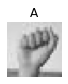

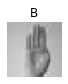

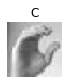

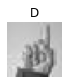

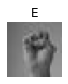

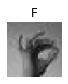

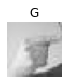

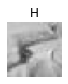

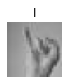

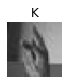

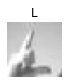

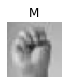

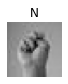

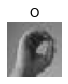

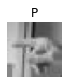

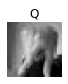

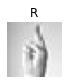

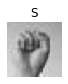

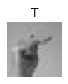

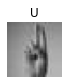

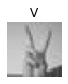

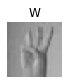

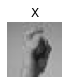

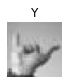

In [ ]:
# plot one image per class
for i in range(1, len(X_val), 150):
  plt.figure(figsize=(1,1))
  plt.imshow(X_val[i])
  plt.axis("off")
  plt.title(CLASSES[np.argmax(y_val[i])])

We have just plotted one image per class. Looking at these images, we might expect that the models that we will be running can confuse some of them, as some letters look a lot alike. Letters ***A, E, M, N*** and ***S*** are all a pretty similar fist shape, with a minor difference. Furthermore, the letters ***T, G and X*** might easily be confused as well. 

In the predictions section, we will take a look at the confusion matrices of the best performing models that came out of the model selection, in order to verify whether this was actually the case or whether the models were robust enough to even be able to distinguish between the very minor differences that exist between the images portraying these letters.

# 4) Training
In this part, we will be training different models on our dataset. After having trained the model on the data, we will subsequently assess the model by analyzing the training processes and plotting the validation loss and accuracy to check if there is any under- or overfitting going on. As a model is only as good as its performance on the validation set, this will be our main focus for assessing the model in this part of the paper. However, both the training and validation performance will be used to verify if there is under- or overfitting going on. After having trained all the models, we will discuss the best performing models' predictive power and performances in section 6 (Predictions) of this paper.

Underfitting happens when the model is underperforming on the training set and is thus not able to converge to the dataset. Consequently, the validation loss and accuracy never saturates. This means that it will be bad at generalizing to unseen data, because it has not been able to learn the decision boundaries. A typical graph of underfitting will show that the accuracy and loss keep going up and down, but never "finally" converge. 

Overfitting on the other hand means that the model is overperforming on the training set and learns a decision boundary that is too narrow and too specific for the individual datapoints. This also means that it will perform poorly on unseen data. A typical graph of overfitting displays a plummeting training loss with a skyrocketing training accuracy. Simultaneously, it shows that the validation loss and accuracy first seem to converge with the training loss and accuracy, but ultimately the validation accuracy goes down again while the validation loss goes up again. The graphs thus start to diverge. 



### 4.1. "Simple" Convolutional Neural Network
Convolutional neural networks are feedforward neural networks, meaning that the connections between the layers don't form a cycle (like with recurrent neural networks) (“Feedforward Neural Network”, 2020). 

First, we will start off with a simple Convolutional Neural Network using Keras' Sequential model. 
- First, we define a Conv2D input layer which has the input shape of our image shape (32x32x3),
  - with "kernel_size" set to (3,3). This refers to the height and width of the convolution window;
  - we define the ReLu (rectified linear unit) activation function. An activation function is responsible for the transforming and summing of the weights in order for them to be fed into the subsequent layer. Simply put, this ReLU activation function returns the input value directly if it is greater than zero, or returns 0 if the input is negative.
- Directly after the input layer, we define a MaxPooling2D layer. This will take the maximum value of the pooling window in question. We set the pool size to (2,2). This decides the height and width of the window of which this layer will take the maximum value of.


- We add a second Conv2D layer, this time with 64 filters but otherwise the same hyperparameters.
- To that, we apply a second MaxPooling2D layer with the same parameters as before.

- We then add a third Conv2D layer with 128 filters but otherwise the same hyperparameters.
- To that, we apply once again a MaxPooling2D layer with the same parameters a before.

- Subsequently, we add a Flatten layer, because a dense network needs the shape of vectors.
- We apply a Dropout layer that will drop out 50% of the output of the previous layer. Dropout is a commonly used technique to avoid overfitting, because it randomly drops out a fraction (here 0.5, 50%) of the output of a previous layer and thus only feeds the remaining fraction of the output as input for the next layer. That layer is thus presented with only a fraction of the input, and needs to learn how to deal with that. This avoids overfitting because this means that the model no longer "gets away" with memorizing the individual datapoints and thus overfitting.


- Then, we add a Dense layer with 512 neurons and again the ReLU activation function.

- Lastly, we define the Dense output layer, which has 24 output neurons, because the model has to classify into 24 labels/classes. It uses the "softmax" activation function because we are dealing with classification. Softmax Activation Function converts a vector of numbers into a vector of probabilities. Each value should be interpreted as the probability of membership for a certain class.

The reason why we first add three Conv2D layers and add a Dense layer at the end (before the Dense output layer), is because there is an important difference between the two of them. Conv2D layers are designed to detect features and associations within layers; nearby associations within features. This is why we first stack the model with three of them, so that they can extract important and discriminating features within the images (within the features). Dense layers on the other hand are designed to extract associations between any of the features involved in the neural network. That is why this layer is crucial to link all the nearby features extracted from the Conv2D layers and to be able to discriminate images and classes more broadly (When to Use Dense, Conv1/2D, Dropout, Flatten, and All the Other Layers?, 2019).

Subsequently, the model is compiled using the CategoricalCrossEntropy loss function because we are dealing with categorical data, with classification. We also use the Adam learning rate optimizer. This learns an individual learning rate for the individual data points, and thus speeds up the fitting of the data. The metric used for the assessment of the performance is accuracy.

In [ ]:
image_shape = (32, 32, 3)

In [ ]:
# try out a Convolutional Network first

def get_simple_ccn():
  model = models.Sequential() 

  # INPUT LAYER 

  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=image_shape)) 
      # maxpooling
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  # HIDDEN CONV2D LAYER

  model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu')) 
      # maxpooling
  model.add(layers.MaxPooling2D(pool_size=(2, 2))) 

  # HIDDEN CONV2D LAYER

  model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu')) 
      # maxpooling
  model.add(layers.MaxPooling2D(pool_size=(2, 2))) 

  
  # FLATTEN LAYER

  model.add(layers.Flatten())
  
  # DROPOUT LAYER

  model.add(layers.Dropout(0.5)) 

  # HIDDEN DENSE LAYER 
  model.add(layers.Dense(512, activation='relu')) 

  # DENSE OUTPUT LAYER: 24 neurons because we have 24 classes
  model.add(layers.Dense(24, activation='softmax'))
  model.compile(loss=keras.losses.CategoricalCrossentropy(), 
                optimizer=optimizers.Adam(lr=1e-4),
                metrics=['acc'])
  return model


In [ ]:
SIMPLE_CNN = get_simple_ccn()
SIMPLE_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [ ]:
# instantiate imagedatagenerator
datagen_train = ImageDataGenerator()
datagen_val =  ImageDataGenerator()

In [ ]:
NUM_EPOCHS = 10
# instantiate early stopping to avoid overfitting
# use val_loss as the monitor for the early stopping: it will stop the epochs after the validation loss has not decreased after 2 epochs.
# restore_best_weights = TRUE: will restore model weights from the epoch with the best value (minimal value) for validation loss
EARLY_STOPPING = tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                  mode="min", 
                                                  patience=2, 
                                                  restore_best_weights=True)

train_gen = datagen_train.flow(X_train, y_train, batch_size=32, shuffle=True)
val_gen = datagen_val.flow(X_val, y_val, batch_size = 32, shuffle=False)



In [ ]:
HIST_SIMPLE_CNN = SIMPLE_CNN.fit(x=train_gen, 
                                 validation_data=val_gen,
                                 epochs=NUM_EPOCHS,
                                 callbacks=[EARLY_STOPPING])

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 3.0452 - acc: 0.1042 - val_loss: 1.6311 - val_acc: 0.5464
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 1.5325 - acc: 0.5240 - val_loss: 0.7728 - val_acc: 0.7819
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.8989 - acc: 0.7074 - val_loss: 0.4650 - val_acc: 0.8753
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.6449 - acc: 0.7843 - val_loss: 0.3116 - val_acc: 0.9083
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.4945 - acc: 0.8359 - val_loss: 0.2046 - val_acc: 0.9533
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3850 - acc: 0.8738 - val_loss: 0.1504 - val_acc: 0.9711
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3072 - acc: 0.9013 - val_loss: 0.1046 - val_acc: 0.9875
Epoch 8/10
600/600 [==============================] - 2s 4ms/step - loss: 0.

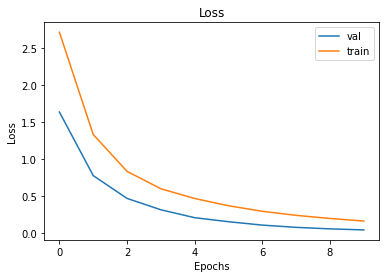

In [ ]:
# plot the training and validation loss
plt.plot(HIST_SIMPLE_CNN.history['val_loss'],  label='val')
plt.plot(HIST_SIMPLE_CNN.history['loss'], label='train')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

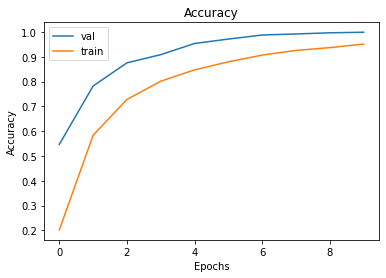

In [ ]:
# plot the training and validation accuracy 
plt.plot(HIST_SIMPLE_CNN.history['val_acc'],  label='val')
plt.plot(HIST_SIMPLE_CNN.history['acc'], label='train')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This model seems to be a very good fit for our dataset. We can see in the printed validation loss and validation accuracy that the model smoothly updates and learns, without overfitting or underfitting and ultimately reaches a very small validation loss and even 0.9986 validation accuracy. From the loss graph, we can see that both the training and validation loss smoothly shrink and follow the same tendency. Similarly, the accuracy graph indicates that the model smoothly reaches high accuracy in both the training set as the validation set. 

This smooth training and validation process might be due to the 50% Dropout layer that we introduced after the Flatten layer. This is a common technique to avoid overfitting, as it drops out a fraction of the output of the previous layer, so that the next layer only gets to see part of the input. This way, it avoids "memorization" of the data, i.e. overfitting.

## 4.2. VGG16 with ImageNet weights
This neural network uses 16 layers in total, of which 13 convolutional layers of which the second, the fourth, the seventh, the tenth and the thirteenth  have a maxpooling layer attached. The 13 convolutional layers are followed by two fully connected layers with 4096 neurons, and a Softmax activation output layer (Thakur, 2020).

We will define our base model without its included top layers (the two fully connected dense layers and the output layer). That way, we can add dense layers and output layers that are tailored to our data and image size. In contrast to convolutional layers, Dense layers are dependent on the input size ("Defining Model in Keras", 2017). Here, we also make use of the pretrained ImageNet weights.  These are the top layers that we define ourselves:

- a GlobalAveragePooling2D layer: this takes the average pixel value of the convolutional block that we stride across the image;
- a Dense layer with 128 neurons and the ReLU activation function;
- a 50% Dropout layer;
- a second Dense layer with 256 neurons and the ReLU activation function
- a second 50% Dropout layer;
- a third Dense layer with 512 neurons and the ReLU activation function;
- a third 50% Dropout layer;
- a Dense output layer of 24 output neurons, because we have 24 classes that the model needs to predict.

These are the same layers that we add in the next neural network (empty ResNet50). At the end, we compile the model with a Categorical Crossentropy loss function, as we have multiple classes. Furthermore, we add the Adam learning rate optimizer, which will speed up our training process as it generates an individual learning rate for the individual data points (instead of one general learning rate for the entire network). We select accuracy as the evaluation metric.

In [ ]:
def VGG16():
  base_model = keras.applications.vgg16.VGG16(
      include_top = False, # we don't want top layer because it is tailored to 1000 output classes, which we don't have
      weights="imagenet",
      input_shape = image_shape)

  x = base_model.output
  x = layers.GlobalAveragePooling2D()(x) 

  x = layers.Dense(128, activation = "relu")(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(256, activation="relu")(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(512, activation = "relu")(x)
  x = layers.Dropout(0.5)(x)

  predictions = layers.Dense(24, activation='softmax')(x)
    # 24 output neurons because we have 24 classes
    # activation='softmax' because we're dealing with classification
  
  model = keras.Model(inputs=base_model.input, outputs=predictions)
  model.compile(loss=keras.losses.CategoricalCrossentropy(), # CategoricalCrossEntropy because we have classification into multiple classes
                optimizer=optimizers.Adam(lr=1e-4), metrics=['acc']) # Adam learning rate optimizer, which computes an individual learning rate and speeds up the process 
  return model

In [ ]:
VGG16 = VGG16()

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
VGG16.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
datagen_train = ImageDataGenerator()
datagen_val =  ImageDataGenerator()

In [ ]:
NUM_EPOCHS = 10
# instantiate early stopping to avoid overfitting
# use val_loss as the monitor for the early stopping: it will stop the epochs after the validation loss has not decreased after 2 epochs.
# restore_best_weights = TRUE: will restore model weights from the epoch with the best value (minimal value) for validation loss
EARLY_STOPPING = tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                  mode="min", 
                                                  patience=2, 
                                                  restore_best_weights=True)

train_gen = datagen_train.flow(X_train, y_train, batch_size=32, shuffle=True)
val_gen = datagen_val.flow(X_val, y_val, batch_size = 32, shuffle=False)


In [ ]:
HIST_VGG16 = VGG16.fit(x=train_gen, 
                       validation_data=val_gen,
                       epochs=NUM_EPOCHS,
                       callbacks=[EARLY_STOPPING])

Epoch 1/10
600/600 [==============================] - 19s 30ms/step - loss: 3.1209 - acc: 0.0599 - val_loss: 2.5233 - val_acc: 0.1992
Epoch 2/10
600/600 [==============================] - 18s 29ms/step - loss: 2.4582 - acc: 0.2340 - val_loss: 2.2494 - val_acc: 0.3206
Epoch 3/10
600/600 [==============================] - 18s 30ms/step - loss: 2.1833 - acc: 0.3281 - val_loss: 1.9426 - val_acc: 0.3744
Epoch 4/10
600/600 [==============================] - 18s 30ms/step - loss: 1.9552 - acc: 0.3650 - val_loss: 1.9689 - val_acc: 0.3608
Epoch 5/10
600/600 [==============================] - 18s 31ms/step - loss: 1.9412 - acc: 0.3645 - val_loss: 1.8639 - val_acc: 0.3753
Epoch 6/10
600/600 [==============================] - 18s 31ms/step - loss: 1.9066 - acc: 0.3681 - val_loss: 1.8610 - val_acc: 0.3742
Epoch 7/10
600/600 [==============================] - 18s 30ms/step - loss: 1.8960 - acc: 0.3659 - val_loss: 1.8562 - val_acc: 0.3750
Epoch 8/10
600/600 [==============================] - 18s 30ms

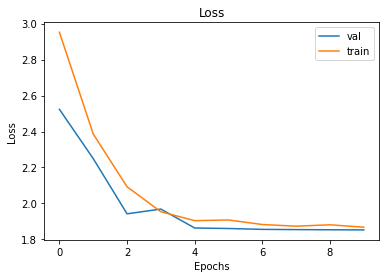

In [ ]:
# plot the training and validation loss
plt.plot(HIST_VGG16.history['val_loss'],  label='val')
plt.plot(HIST_VGG16.history['loss'], label='train')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

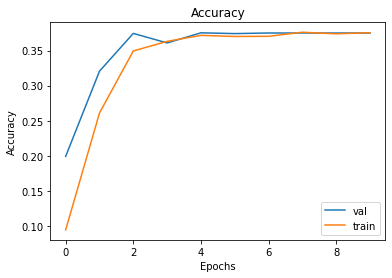

In [ ]:
# plot the training and validation accuracy 
plt.plot(HIST_VGG16.history['val_acc'],  label='val')
plt.plot(HIST_VGG16.history['acc'], label='train')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The VGG16 model with excluded top layers (and self-defined / added top layers) quite clearly seems to be underfitting on our data. We can see that the training and validation loss and accuracy do not improve significantly, the model clearly doesn't seem to learn, which means that it is underfitting. A common solution might be to add more and more robust layers, but it is clear that this will unlikely solve our problem. See, the VGG16 model already consists of 13 convolutional layers, to which we added three fully-connected dense layers. The CNN that we fit first, only consists of three convolutional layers and one fully-connected dense layer, and performed significantly better than this model.

That is why we will move on to a new and more robust network, ResNet50. First, we will try out ResNet50 with randomly initialized weights. 


## 4.3. Empty ResNet50
First, we will fit an empty ResNet50 model. With "empty", we mean that we will not yet include the pretrained ImageNet weights (cf. infra). Instead, this will use randomly initialized weights which will be updated during the training process. ResNet50 is a convolutional neural network with 50 layers, for Residual Learning. It has 48 Convolution layers, 1 MaxPooling layer and 1 AveragePooling layer (Kaushik, 2020). We set `include_top=False`  because we do not want to include the final pooling layer nor the fully connected layer (Dwivedi, 2019). Instead, we stack our own three connected Dense layers, each paired with a 50% Dropout layer to avoid overfitting. As stated above, Dense layers are designed to find associations between any features, and will help link together all the preceding convolutions. Residual Learning means that the model tries to learn the residuals instead of the actual features, by using shortcut connections which are established by skipping one or more layers (Fung, 2020). We add: 
- a GlobalAveragePooling2D layer: this takes the average pixel value of the convolutional block that we stride across the image;
- a Dense layer with 128 neurons and the ReLU activation function;
- a 50% Dropout layer;
- a second Dense layer with 256 neurons and the ReLU activation function
- a second 50% Dropout layer;
- a third Dense layer with 512 neurons and the ReLU activation function;
- a third 50% Dropout layer;
- a Dense output layer of 24 output neurons, because we have 24 classes that the model needs to predict.

Lastly, we compile the model with a Categorical Crossentropy loss function, because we are dealing with classification into multiple classes. We add the Adam learning rate optimizer, which will compute an individual learning rate for the individual datapoints (instead of one general learning rate for the entire network), and this will speed up our training process. We select accuracy as the evaluation metric. 

In our first model (`SIMPLE_CNN`), we only added one 50% Dropout layer. The reason that we only applied one in that model, but add three in this model (as well as the previous VGG16) is fairly straightforward. The ResNet50 model consists of 48 Convolutional layers, a MaxPooling and GlobalAveragePooling layer. This neural network is thus far bigger than our `SIMPLE_CNN` was with only three Convolutional layers. The ResNet50 thus has a far bigger chance of **overfitting** on our data, because it is more complicated and more robust. That's why we add more Dropout layers, to anticipate and avoid this risk of overfitting.

In [ ]:
# first train an "empty" resnet without pretrained weights

def get_empty_resnet(weights=None):
    base_model = keras.applications.ResNet50(
        include_top = False, # not include the final pooling and fully connected layer in the original model so we can add our own connected layers
        weights = None, # initialize the model with random weights
        input_tensor = None, # Keras tensor to use as image input for the model. We have images so don't need or want those.
        input_shape = image_shape, # our image shape is (32,32,3)
        pooling = None) # pooling mode for feature extraction. We add a pooling layer after the input, not in the base model.
    
    # INPUT LAYER
    x = base_model.output 
    x = layers.GlobalAveragePooling2D()(x) 
          # GlobalAveragePooling takes the average pixel value of the convolutional block that we stride across the images. 
          # contrary to MaxPooling, which takes the maximum pixel value of the convolutional window

    # DENSE LAYERS 
        # we only add Dense layers as connected layers on top of the ResNet50.
        # Resnet50 already includes 48 Convolution layers, 1 MaxPooling layer and 1 AveragePooling layer, so that is why we do not add any extra
        # convolutional layers.
        # We only stack three dense layers, each paired with a 50% Dropout layer because they are fully connected layers and look for associations between any features.
    x = layers.Dense(128, activation = "relu")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation = "relu")(x)
    x = layers.Dropout(0.5)(x)

    # OUTPUT LAYER 
    
    predictions = layers.Dense(24, activation='softmax')(x)
    # 24 output neurons because we have 24 classes
    # activation='softmax' because we're dealing with classification
  
    model = keras.Model(inputs=base_model.input, outputs=predictions)
    model.compile(loss=keras.losses.CategoricalCrossentropy(), # CategoricalCrossEntropy because we have classification into multiple classes
                optimizer=optimizers.Adam(lr=1e-4), metrics=['acc']) # Adam learning rate optimizer, which computes an individual learning rate and speeds up the process 
    return model

In [ ]:
EMPTY_RESNET = get_empty_resnet()

In [ ]:
#EMPTY_RESNET.summary()

In [ ]:
# instantiate early stopping to avoid overfitting
# use val_loss as the monitor for the early stopping: it will stop the epochs after the validation loss has not decreased after 2 epochs.
# restore_best_weights = TRUE: will restore model weights from the epoch with the best value (minimal value) for validation loss
EARLY_STOPPING = tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                  mode="min", 
                                                  patience=2, 
                                                  restore_best_weights=True)

In [ ]:
train_gen = datagen_train.flow(X_train, y_train, batch_size=32, shuffle=True)
val_gen = datagen_val.flow(X_val, y_val, batch_size = 32, shuffle=False)

In [ ]:
NUM_EPOCHS = 10
HIST_EMPTY_RESNET = EMPTY_RESNET.fit(x=train_gen, 
                                     validation_data=val_gen,
                                     epochs = NUM_EPOCHS,
                                     callbacks=[EARLY_STOPPING])

Epoch 1/10
600/600 [==============================] - 29s 40ms/step - loss: 3.3363 - acc: 0.0427 - val_loss: 3.1786 - val_acc: 0.0397
Epoch 2/10
600/600 [==============================] - 23s 39ms/step - loss: 3.1828 - acc: 0.0409 - val_loss: 3.1748 - val_acc: 0.0486
Epoch 3/10
600/600 [==============================] - 23s 39ms/step - loss: 3.1742 - acc: 0.0467 - val_loss: 3.1071 - val_acc: 0.0708
Epoch 4/10
600/600 [==============================] - 23s 38ms/step - loss: 3.0852 - acc: 0.0702 - val_loss: 3.0518 - val_acc: 0.0742
Epoch 5/10
600/600 [==============================] - 23s 39ms/step - loss: 3.0261 - acc: 0.0712 - val_loss: 2.9720 - val_acc: 0.0842
Epoch 6/10
600/600 [==============================] - 23s 39ms/step - loss: 2.9634 - acc: 0.0778 - val_loss: 2.9586 - val_acc: 0.0917
Epoch 7/10
600/600 [==============================] - 23s 39ms/step - loss: 2.9141 - acc: 0.0869 - val_loss: 2.9436 - val_acc: 0.1069
Epoch 8/10
600/600 [==============================] - 23s 38ms

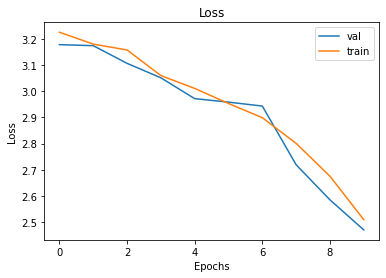

In [ ]:
plt.plot(HIST_EMPTY_RESNET.history['val_loss'],  label='val')
plt.plot(HIST_EMPTY_RESNET.history['loss'], label='train')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

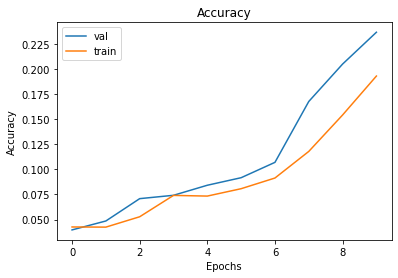

In [ ]:
plt.plot(HIST_EMPTY_RESNET.history['val_acc'],  label='val')
plt.plot(HIST_EMPTY_RESNET.history['acc'], label='train')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This does not look good.
This model is clearly **underfitting** on the data: training goes very slow and both the training loss and accuracy as the validation loss and accuracy do not converge. Consequently, our model will perform poorly onto unseen data. We might want to increase the epochs, but this will unlikely solve our problem. If a model this robust is underfitting, we would have to run a lot of epochs and the model might still be very underperforming. That's why we will try out the same Resnet50, but with the pretrained ImageNet weights. These are weights that have been pretrained on the large ImageNet dataset, which has been trained on over 14 million images (Gupta, 2020). 

## 4.4. ResNet50 with ImageNet weights
In this section, we will build the same ResNet50 neural network as we did above, using the same layers and hyperparameters. Only this time, we make use of the pretrained ImageNet weights, which have been pretrained on the large ImageNet dataset of over 14 million images (Gupta, 2020). 


In [ ]:
def get_pretrained_resnet(weights="imagenet"):
    base_model = keras.applications.ResNet50(
        include_top = False, # not include the final pooling and fully connected layer in the original model so we can add our own connected layers
        weights = "imagenet", # load pretrained ImageNet weights
        input_tensor = None, # Keras tensor to use as image input for the model. We have images so don't need or want those.
        input_shape = image_shape, # our image shape is (32,32,3)
        pooling = None) # pooling mode for feature extraction. We add a pooling layer after the input, not in the base model.
    
    # INPUT LAYER
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
          # GlobalAveragePooling takes the average pixel value of the convolutional block that we stride across the images. 
          # contrary to MaxPooling, which takes the maximum pixel value of the convolutional window

    # DENSE LAYERS 
        # we only add Dense layers as connected layers on top of the ResNet50.
        # Resnet50 already includes 48 Convolution layers, 1 MaxPooling layer and 1 AveragePooling layer, so that is why we do not add any extra
        # convolutional layers.
        # We only stack three dense layers, each paired with a 50% Dropout layer because they are fully connected layers and look for associations between any features.
   
    x = layers.Dense(128, activation = "relu")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation = "relu")(x)
    x = layers.Dropout(0.5)(x)

    # OUTPUT LAYER 
    
    predictions = layers.Dense(24, activation='softmax')(x)
    # 24 output neurons because we have 24 classes
    # activation='softmax' because we're dealing with classification
  
    model = keras.Model(inputs=base_model.input, outputs=predictions)
    model.compile(loss=keras.losses.CategoricalCrossentropy(), # CategoricalCrossEntropy because we have classification into multiple classes
                optimizer=optimizers.Adam(lr=1e-4), metrics=['acc']) # Adam learning rate optimizer, which computes an individual learning rate and speeds up the process
    return model

In [ ]:
PRETRAINED_RESNET = get_pretrained_resnet()

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
train_gen = datagen_train.flow(X_train, y_train, batch_size=32, shuffle=True)
val_gen = datagen_val.flow(X_val, y_val, batch_size = 32, shuffle=False)

In [ ]:
# instantiate early stopping to avoid overfitting
# use val_loss as the monitor for the early stopping: it will stop the epochs after the validation loss has not decreased after 2 epochs.
# restore_best_weights = TRUE: will restore model weights from the epoch with the best value (minimal value) for validation loss
EARLY_STOPPING = tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                  mode="min", 
                                                  patience=2, 
                                                  restore_best_weights=True)

In [ ]:
NUM_EPOCHS = 10
HIST_PRETRAINED_RESNET = PRETRAINED_RESNET.fit(x=train_gen, 
                                               validation_data=val_gen,
                                               epochs=NUM_EPOCHS,
                                               callbacks=[EARLY_STOPPING])

Epoch 1/10
600/600 [==============================] - 28s 40ms/step - loss: 3.4560 - acc: 0.0662 - val_loss: 3.2062 - val_acc: 0.0442
Epoch 2/10
600/600 [==============================] - 23s 39ms/step - loss: 2.0614 - acc: 0.3785 - val_loss: 0.8876 - val_acc: 0.7753
Epoch 3/10
600/600 [==============================] - 23s 39ms/step - loss: 0.9263 - acc: 0.7126 - val_loss: 0.1010 - val_acc: 0.9642
Epoch 4/10
600/600 [==============================] - 23s 38ms/step - loss: 0.3736 - acc: 0.8862 - val_loss: 0.0130 - val_acc: 0.9950
Epoch 5/10
600/600 [==============================] - 23s 39ms/step - loss: 0.1974 - acc: 0.9476 - val_loss: 0.0028 - val_acc: 0.9989
Epoch 6/10
600/600 [==============================] - 23s 39ms/step - loss: 0.1417 - acc: 0.9651 - val_loss: 0.0033 - val_acc: 0.9997
Epoch 7/10
600/600 [==============================] - 23s 38ms/step - loss: 0.1238 - acc: 0.9708 - val_loss: 0.0102 - val_acc: 0.9986


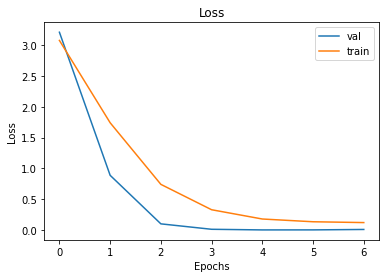

In [ ]:
# copied from class notebook
plt.plot(HIST_PRETRAINED_RESNET.history['val_loss'],  label='val')
plt.plot(HIST_PRETRAINED_RESNET.history['loss'], label='train')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

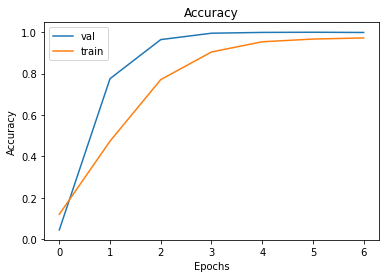

In [ ]:
# copied from class notebook
plt.plot(HIST_PRETRAINED_RESNET.history['val_acc'],  label='val')
plt.plot(HIST_PRETRAINED_RESNET.history['acc'], label='train')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can see that this model performs a lot better on the data than the previous ResNet50 with randomly initialized weights did. As stated above, ResNet50 is a convolutional network with 50 layers. Here, we use the ImageNet weights. These are the weights that were trained on more than 14 million images of the ImageNet dataset (Mathworks, n.d.). As a result, the model no longer underfits on our dataset, even though all of the other parameters and layers in this model are the exact same as the previous Resnet50 model we ran (with randomly initialized weights). 

Consequently, our training process is fast but smooth, as is the performance on the validation set. We instantiated an early stopping callback that will stop the epochs if the minimum validation loss hasn't changed (lowered) after 2 epochs. As we can see, the training effectively stopped after the seventh epoch. After that, we see a validation accuracy of 0.9986 and a validation loss of only 0.0102. 

We can see that the model is not underfitting, as both the training and validation graphs seem close to convergence. It is not overfitting either, as the training process goes as smooth as the validation process and the model does not seem to have memorized the training set (which would result in an excellent performance on the training set, but a bad performance on the validation set). 

Overall, we can say that this model performs well on our data set and reaches a comparable accuracy to the simple CNN we ran first.

## 4.5. MobileNet with ImageNet weights
In this section, we will try out a MobileNet convolutional neural network, that is open-sourced by Google. The MobileNet network is known for being a lightweight deep neural network, as it does not have as much parameters as the regular neural networks. That is why we only add one fully-connected Dense layer.

MobileNet uses depthwise separable convolutions, meaning that they contain a depthwise convolution (channel-wise, we have three channels so 3x3) followed by a pointwise convolution (with kernel size 1x1 to change the dimension), which is why we don't add any Dropout layers. The main advantage of MobileNet compared to other convolutional neural networks, is that it tries to maximize accuracy while being less computationally expensive (Pujara, 2020).

Lastly, like we did with all other models, we compile the model with Categorical Crossentropy as we are dealing with multiple classes and we define the Adam learning rate optimizer. 

In [ ]:
def mobilenet(weights="imagenet"):
  base_model = keras.applications.MobileNet(
      input_shape = image_shape,
      include_top = False,
      weights = "imagenet",
      input_tensor = None, 
      pooling = None)
  
  #  INPUT LAYER
  x = base_model.output
  x = layers.GlobalAveragePooling2D()(x) # average output
  # add fully-connected layer
  x = layers.Dense(1024, activation='relu')(x)
  # output layer with 24 neurons because 24 classes
  predictions = layers.Dense(24, activation='softmax')(x)

  
  model = keras.Model(inputs=base_model.input, outputs=predictions)
  model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])
  return model


In [ ]:
MOBILENET = mobilenet()

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
train_gen = datagen_train.flow(X_train, y_train, batch_size=32, shuffle=True)
val_gen = datagen_val.flow(X_val, y_val, batch_size = 32, shuffle=False)

In [ ]:
# instantiate early stopping to avoid overfitting
# use val_loss as the monitor for the early stopping: it will stop the epochs after the validation loss has not decreased after 2 epochs.
# restore_best_weights = TRUE: will restore model weights from the epoch with the best value (minimal value) for validation loss
EARLY_STOPPING = tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                  mode="min", 
                                                  patience=2, 
                                                  restore_best_weights=True)

In [ ]:
NUM_EPOCHS = 10
HIST_MOBILENET = MOBILENET.fit(x=train_gen, 
                                validation_data=val_gen,
                                epochs=NUM_EPOCHS,
                               callbacks=[EARLY_STOPPING])

Epoch 1/10
600/600 [==============================] - 9s 11ms/step - loss: 1.8826 - acc: 0.4769 - val_loss: 0.1796 - val_acc: 0.9506
Epoch 2/10
600/600 [==============================] - 6s 10ms/step - loss: 0.1936 - acc: 0.9381 - val_loss: 0.0412 - val_acc: 0.9878
Epoch 3/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0913 - acc: 0.9716 - val_loss: 0.0152 - val_acc: 0.9950
Epoch 4/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0567 - acc: 0.9825 - val_loss: 0.0149 - val_acc: 0.9956
Epoch 5/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0520 - acc: 0.9821 - val_loss: 0.0029 - val_acc: 0.9992
Epoch 6/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0504 - acc: 0.9835 - val_loss: 0.0112 - val_acc: 0.9967
Epoch 7/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0288 - acc: 0.9910 - val_loss: 0.0203 - val_acc: 0.9975


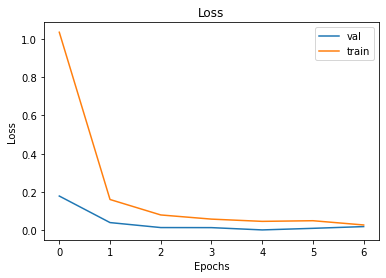

In [ ]:
# copied from class notebook
plt.plot(HIST_MOBILENET.history['val_loss'],  label='val')
plt.plot(HIST_MOBILENET.history['loss'], label='train')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

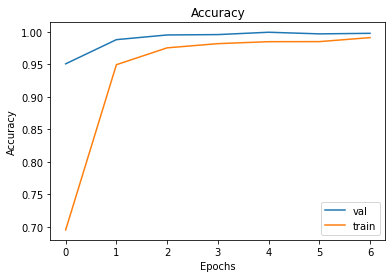

In [ ]:
# copied from class notebook
plt.plot(HIST_MOBILENET.history['val_acc'],  label='val')
plt.plot(HIST_MOBILENET.history['acc'], label='train')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This model seems to perform really well on our dataset. It reaches a slightly lower validation accuracy than the simple CNN and the pretrained ResNet50. Nevertheless, the plots of this model seem a little bit more promising than the ones of the ResNet50, as we can see that the training goes faster and the validation easily follows.


We can see that the model has not overfit nor underfit in the 7 epochs that it ran (because of early stopping). The train and validation accuracy follow the same tendency, without diverging (overfitting), as is the case for the train and validation loss. Both the train and validation accuracy and loss seem very close to convergence, which means that the model is not underfitting nor overfitting.

So, purely in performance this model is comparable to both the simple CNN as the pretrained ResNet50. However, we can see that there is a significant difference in speed between the simple CNN and the MobileNet on one side and the pretrained ResNet50 on the other. Where the simple CNN takes an average of 4ms/step, the MobileNet takes approximately 6ms/step and the ResNet50 takes 39ms/step. That is an important difference, but also a logical one as the ResNet50 has substantially more layers.

# 5) Intermediate conclusion

From what we have observed up until now, we can say that the simple CNN, the pretrained ResNet50 with ImageNet weights and the MobileNet with ImageNet weights yield very comparable results in terms of performance. The ResNet50 with randomly initialized weights as well as the VGG16, however, clearly underfit on our data.

Between those three best performing models, we can also see some important differences. All of them actually yield very similar results of validation accuracies above 0.99 and validation losses smaller than 0.04. Pretrained ResNet50 obtains the same validation accuracy as the simple CNN we ran (0.9986), but has a lower validation loss (0.0102 vs 0.0397). MobileNet obtains a validation accuracy of 0.9975 and a validation loss of 0.0203. So clearly, all of them are definitely in the same ballpark and we are comparing very small differences in results. However, while the pretrained ResNet50 is relatively the best performer, it is also the slowest learner, with 39ms/step, compared to 4ms/step for CNN and 6ms/step for MobileNet.

In general, it is clear that simple CNN, pretrained ResNet50 and MobileNet all perform really well and yield very similar results. Therefore, we will use them to make predictons on the test set that has been kept apart until now, and subsequently assess which of them is best suited for generalizing onto the unseen part of our data.

# 6) Predictions
In this section, we will test the performance of the models that performed best during model selection, which are the simple CNN, the pretrained ResNet50 with ImageNet weights, and the MobileNet with ImageNet weights, on their ability to generalize to the test set. Subsequently, we will inspect the confusion matrices to see whether the models were able to distinguish between letters that seemed easy to confuse (cf. supra). 


## 6.1. Simple CNN
This Sequential "simple" Convolutional Neural Network resulted in a validation loss of 0.0397 and validation accuracy of 0.9986 after 10 epochs during model selection. Furthermore, it yielded a smooth but fast increase in validation accuracy as well as a rapidly decreasing validation loss.

In [ ]:
# store predictions in variable
pred_simple_cnn = SIMPLE_CNN.predict(TEST_GEN)

In [ ]:
accuracy_score(np.argmax(y_test, axis=1), # argmax because one-hot encoded
               np.argmax(pred_simple_cnn, axis=1))# argmax because one-hot encoded

0.9295833333333333

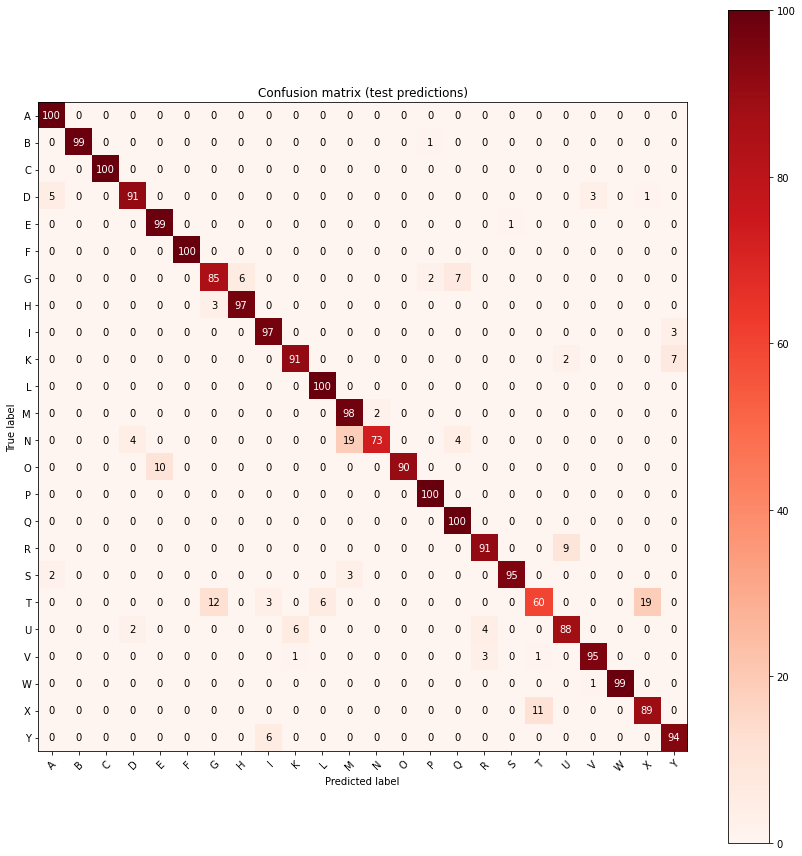

In [ ]:
# copied from class notebook
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_simple_cnn, axis=1)) 
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(cm, interpolation='nearest', cmap='Reds')
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=CLASSES, yticklabels=CLASSES,
       title='Confusion matrix (test predictions)',
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(j, i, format(cm[i, j], fmt),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

First of all, this confusion matrix looks very good. We can see that there are some important deviations. Above, we hypothesized that the letters *A, E, M, N* and *S* look similar and might be confused by the networks. We also observed a noticeable and possibly confusing similarity between the letters *T, G* and *X*.

*   The letter T was the hardest to predict, as it has a True Positive Rate of 60%, while most of the TPRs are between 90% and 100%.
    - As expected, as much as 19 images depicting the letter *T* have been predicted as *X*.
    - 12 images portraying *T* have been predicted as *G*. 
* Inversely, we can see that the letter X has a higher TPR than the letter *T*, but *T* is also the only letter as which the true label *X* has been incorrectly predicted.
* The letter *N* is also a class that has a relatively lower True Positive Rate than the other classes, and, as expected, has been misclassified as *M* as much as 19 times out of 100. 
* Strangely, this is not the case for *M*, as it has a True Positive Rate of 98 and is only misclassified as *N* twice.
* The letter *G* however has not been misclassified as *T* or *X* but rather as *Q* or *P*.
* The model performed best on *A, C, F, L, P* and *Q*, reaching a True Positive Rate of 100%. 

So in general, this model performs very well on the test set, as was to be expected from its performance on the validation set. Our Sequential "simple" Convolutional Network reaches a prediction accuracy of 92.9%. Moreover, the large majority of the classes yield a True Positive Rate between 90% and 100%, despite some minor deviations in the classes *G, U* and *X*, and larger deviations in the classes *N* (TPR 73%) and *T* (TPR 60%).









## 6.2. ResNet50 with ImageNet weights
The ResNet50 with ImageNet weights had exactly the same layers and parameters as the empty ResNet50 that we trained right before (but performed poorly), with the only difference of the inclusion of ImageNet weights. These are weights that have been pretrained on more than 14 million images (Gupta, 2020). 

This model reached a validation accuracy of 0.9986 and a validation loss of 0.0102 during model selection after 7 epochs, making it our best performing model on the validation set, despite being the slowest learner (39ms/step vs. 4ms/step (CNN) and 6ms/step (MobileNet)). 

In [ ]:
pred_pretrained_resnet = PRETRAINED_RESNET.predict(TEST_GEN)

In [ ]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(pred_pretrained_resnet, axis=1))

0.9779166666666667

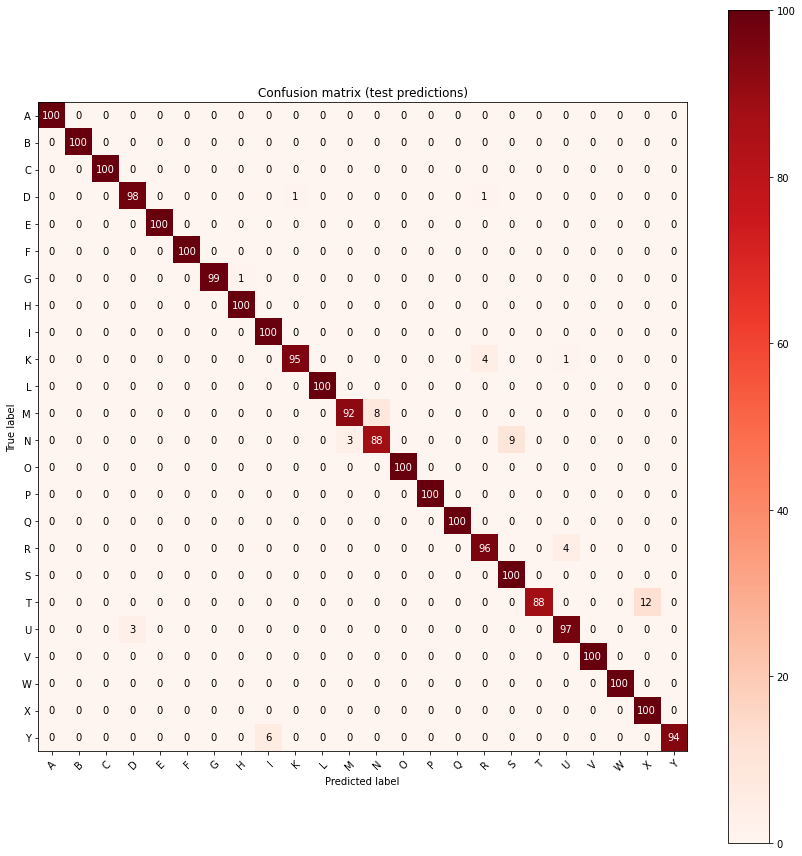

In [ ]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_pretrained_resnet, axis=1)) # make sure that the variable names match!
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(cm, interpolation='nearest', cmap='Reds')
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=CLASSES, yticklabels=CLASSES,
       title='Confusion matrix (test predictions)',
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(j, i, format(cm[i, j], fmt),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

This neural network again reaches a very high performance, on the test set this time around, reaching a prediction accuracy of 97.8%. In its confusion matrix we see less "extreme" tendencies of misclassification than in the previous one. 

* The letter *T* however still has one of the lowest True Positive Rates, together with the letter *N*, namely 88%. As could be expected, *T* has been misclassified as *X* in 12% of the test images. 
* We see the same True Positive Rate for *N*, which has been most often misclassified as the letter *S*, and less often as the letter *M*, which was a much more outspoken tendency in the simple CNN.

In general, the model seems to have performed very well on all of the classes, as most True Positive Rates range between 90% and 100%. Furthermore, this network performs better on our data than the simple CNN did. Not only did it get a higher accuracy score on the predictions than the simple CNN (97.8% vs 92.9%), but it also managed to better distinguish between images of letters that look very similar.

## 6.3. MobileNet with ImageNet weights
The MobileNet with ImageNet weights yielded a slightly lower performance than the other two networks in terms of validation accuracy during model selection, while still being very comparable. It managed to reach a validation accuracy of 0.9975 and a validation loss of 0.0203 after 7 epochs. However, in terms of learning speed (at 6ms/step), it is comparable to the simple CNN we ran first (4ms/step). In the learning loss and accuracy plots, we can see that this model indeed learns very fast, as the training accuracy shoots up after the second epoch and we can see the same downward tendency in the training loss. 

In [ ]:
pred_mobilenet = MOBILENET.predict(TEST_GEN)

In [ ]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(pred_mobilenet, axis=1))

0.9454166666666667

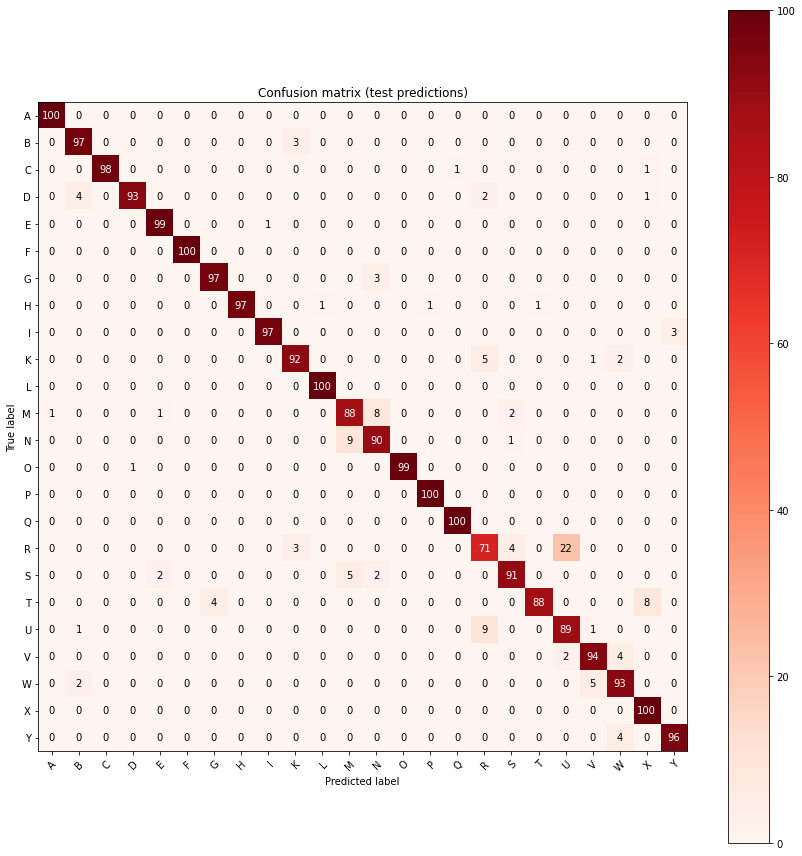

In [ ]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_mobilenet, axis=1)) # make sure that the variable names match!
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(cm, interpolation='nearest', cmap='Reds')
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=CLASSES, yticklabels=CLASSES,
       title='Confusion matrix (test predictions)',
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(j, i, format(cm[i, j], fmt),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

The MobileNet seems to be right in the middle of the two previous neural networks, both in terms of prediction accuracy as in the confusion matrix. It reaches a prediction accuracy of 94.5%. Furthermore, it seems to perform relatively similarly on the letters that were proven to be hard to distinguish, with the exception of the letter R.
- MobileNet performs similarly on the letter *T*, with a True Positive Rate of 88% and misclassifying it as *X* in 8% of the cases, and as *G* in 4% of the cases. These are the letters that we expected to be difficult to distinguish after the visualization of the data, and with which the previous models also seemed to have some trouble.
- Furthermore, we see that the model has a hard time predicting *R*, reaching the lowest True Positive Rate in this model, namely 71%, predicting the letter as *U* in 22% of cases.

# 7) Conclusion
We will again load one image per class as we did in the beginning of this project paper, so that is is easier to compare similarly looking letters without having to scroll back up.

This project paper aimed to build successful neural networks to classify images portraying the American Sign Language Alphabet in the light of the Machine Learning II course. Even though there has already been done more complicated and more impressive work in this field (cf. Introduction), we were able to find three neural networks that each reached a prediction accuracy between 92.9% and 97.8%. The neural networks that we investigated classified 25,200 images spread across a train, validation and test set into 24 classes (letters) of the ASL alphabet, excluding the letter *J* and *Z*, as these require motion. We looked at a simple Sequential Convolutional Neural Network, the VGG16 neural network with ImageNet weights, a ResNet50 neural network with randomly initialized weights, the same ResNet50 but instead using pretrained ImageNet weights, and the MobileNet neural network with pretrained ImageNet weights. 

After we performed model selection by training each of the networks and assessing their performance to generalize onto the validation set, it became clear that both the VGG16 neural network and the "empty" ResNet50 were underfitting on our data, not being able to learn the data set properly within 10 epochs, thus not being able to reach convergence. The other three on the other hand, were proven to be very effective for our classification task and resulted in similar performances on the validation set. To be more precise, the simple CNN reached a validation accuracy of 0.9986 and a validation loss of 0.0397 after 10 epochs, the pretrained ResNet50 also reached a validation accuracy of 0.9986 and a validation loss of 0.0102 after 7 epochs (early stopping), and the MobileNet reached a validation accuracy of 0.9975 and a validation loss of 0.0203 after 7 epochs (early stopping). 

While the three best performing models all performed similarly during model selection, there were some clear differences during the prediction part of this paper, where the trained networks needed to predict on the test set that had been kept apart until then. 
> The simple CNN yielded the lowest performance, reaching a prediction accuracy of 92.9%. As could be interpreted from the confusion matrix, this neural network had a hard time predicting the letter *T*, reaching only a True Positive Rate of 60% and misclassifying it as *X* in 19% of cases and as *G* in 12% of cases. The letter *N* was also misclassified as *M* in 19% of cases. These are tendencies that are also represented in the other two neural networks, but less markedly so. 

> The ResNet50 neural network with ImageNet weights performed best on the test set, reaching a prediction accuracy of 97.8%. Furthermore, it is clear that this neural network was noticeably better at predicting letters that are visually alike. We see more or less the same tendencies reflected as in the simple CNN, as it misclassifies the letter *T* as *X* in 12% of the test images, reaching one of the lowest True Positive Rates in this model (88%). We see the same True Positive Rate for the letter *N*, which has been misclassified as the letter *S* more often than as the letter *M* (a tendency that was more outspoken in the simple CNN). However, most True Positive Rates ranged between approximately 90% and 100%, which is a noteworthy performance.

> MobileNet covers the middle ground between the previous two neural networks in making predictions on the test set, reaching a prediction accuracy of 94.5%. As was the case in the other two networks, the MobileNet has some trouble classifying the letter *T* correctly, yielding a True Positive Rate of 88% by misclassifying as *X* 8% of times and as *G* 4% of times. We also observe a new tendency of confusion in this matrix, as the network reaches its lowest True Positive Rate for the letter *R* (71%), predicting it as *U* in 22% of cases, which is the largest False Negative Rate reached across all models in the *Predictions* section.

In conclusion, the models that performed best on the validation set performed similarly on the test set, while the ResNet50 with pretrained ImageNet weights was clearly the best performing neural network, yielding a prediction accuracy of 97.8%. The VGG16 with ImageNet weights and ResNet50 with randomly initialized weights were underfitting on our validation set during model selection, not being able to reach convergence. 

While this project paper only scratches the surface of what is possible with image classification using neural networks, it was able to reach high performances and further research could mean an indispensable improvement for the Deaf and hard of hearing majority.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


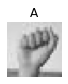

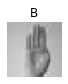

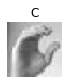

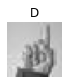

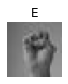

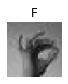

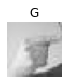

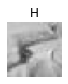

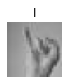

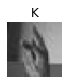

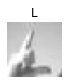

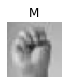

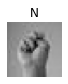

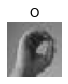

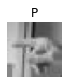

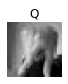

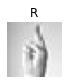

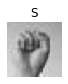

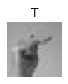

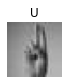

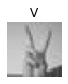

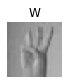

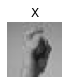

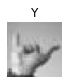

In [ ]:
# plot one image per class
for i in range(1, len(X_val), 150):
  plt.figure(figsize=(1,1))
  plt.imshow(X_val[i])
  plt.axis("off")
  plt.title(CLASSES[np.argmax(y_val[i])])

# Resources

* Amer Kadhim, R., & Khamees, M. (2020). A Real-Time American Sign Language Recognition System using Convolutional Neural Network for Real Datasets. TEM Journal, 937–943. https://doi.org/10.18421/tem93-14

* Bonner, A. (2019, June 1). The Complete Beginner’s Guide to Deep Learning: Convolutional Neural Networks and Image Classification. Medium. https://towardsdatascience.com/wtf-is-image-classification-8e78a8235acb#:%7E:text=Image%20classification!,the%20scenes%20in%20image%20classification

* Chiu, 邱.A. (2020, July 6). [Feature Engineering & Python]What is Integer Encoding and One-Hot Encoding when doing Feature Engineering ? Medium. https://annettechiu.medium.com/what-is-one-hot-encoding-when-doing-data-cleaning-2f28fbd029ac

* Defining model in keras (include_top = True). (2017, September 4). [Forum answer]. Stack Overflow. https://stackoverflow.com/questions/46036522/defining-model-in-keras-include-top-true

* Dwivedi, P. (2019, March 27). Understanding and Coding a ResNet in Keras - Towards Data Science. Medium. https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

* Feedforward neural network. (2020, December 13). In Wikipedia. https://en.wikipedia.org/wiki/Feedforward_neural_network

* Fung, V. (2018, June 21). An Overview of ResNet and its Variants - Towards Data Science. Medium. https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035

* Gupta, V. (2020, August 6). Keras Tutorial : Using pre-trained ImageNet models | Learn OpenCV. Learn OpenCV | OpenCV, PyTorch, Keras, Tensorflow Examples and Tutorials. https://learnopencv.com/keras-tutorial-using-pre-trained-imagenet-models/

* Hand-Sign-Images. (2020, April 7). Kaggle. https://www.kaggle.com/ash2703/handsignimages

* Image Preparation for Convolutional Neural Networks with TensorFlow’s Keras API. (2020, July 16). [Video]. YouTube. https://www.youtube.com/watch?v=_L2uYfVV48I&list=WL&index=20

* Jachak, R. (2020, May 2). American Sign Language Recognition - Towards Data Science. Medium. https://towardsdatascience.com/american-sign-language-recognition-using-cnn-36910b86d651

* Kaushik, A. (2020, July 21). Understanding ResNet50 architecture. OpenGenus IQ: Learn Computer Science. https://iq.opengenus.org/resnet50-architecture/#:%7E:text=ResNet50%20is%20a%20variant%20of,explored%20ResNet50%20architecture%20in%20depth.

* Pigou, L., Dieleman, S., Kindermans, P., & Schrauwen, B. (2015, January 1). Sign Language Recognition Using Convolutional Neural Networks. CORE Reader. https://core.ac.uk/reader/191309220

* Pujara, A. (2020, December 31). MobileNet Convolutional neural network Machine Learning Algorithms | Analytics Vidhya. Medium. https://medium.com/analytics-vidhya/image-classification-with-mobilenet-cc6fbb2cd470

* ResNet-50 convolutional neural network - MATLAB resnet50 - MathWorks Benelux. (n.d.). Mathworks. Retrieved January 21, 2021, from https://nl.mathworks.com/help/deeplearning/ref/resnet50.html

* Thakur, R. (2020, November 24). Step by step VGG16 implementation in Keras for beginners. Medium. https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c#:%7E:text=VGG16%20is%20a%20convolution%20neural,vision%20model%20architecture%20till%20date.&text=It%20follows%20this%20arrangement%20of,consistently%20throughout%20the%20whole%20architecture.

* When to use Dense, Conv1/2D, Dropout, Flatten, and all the other layers? (2019, January 16). [Forum answer]. Data Science Stack Exchange. https://datascience.stackexchange.com/questions/44124/when-to-use-dense-conv1-2d-dropout-flatten-and-all-the-other-layers
